In [32]:
# plotting libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# data analysis libraries
import pandas as pd
import numpy as np

# general imports
from pathlib import Path

# auxiliary functions
import s3ts.models.analysis as aux

In [33]:
folder = Path("storage/synced")

# load all csv files in the folder using pandas
df = pd.concat([pd.read_csv(f) for f in folder.glob("*.csv")])
df

,mode,arch,dataset,val_size,max_epochs,batch_size,pretrain_mode,window_length,window_time_stride,window_patt_stride,...,train_event_mult,nevents_test,nevents_train_lim,nevents_train_tot,time_dm,time_train,time_total,stride_series,val_mse,val_r2
0,TS,RNN,GunPoint,0.25,120,128,False,10,1,1,...,4.0,200.0,256.0,256.0,15.087878,5999.429551,6014.517429,NaN,NaN,NaN
1,TS,RNN,GunPoint,0.25,120,128,False,30,1,1,...,4.0,200.0,256.0,256.0,16.702364,7802.926861,7819.629225,NaN,NaN,NaN
2,TS,RNN,GunPoint,0.25,120,128,False,50,1,1,...,4.0,200.0,256.0,256.0,14.063380,12719.526897,12733.590278,NaN,NaN,NaN
3,TS,RNN,GunPoint,0.25,120,128,False,70,1,1,...,4.0,200.0,256.0,256.0,13.355322,16511.897099,16525.252422,NaN,NaN,NaN
0,TS,CNN,CBF,0.25,120,128,False,10,1,1,...,4.0,200.0,384.0,384.0,16.327039,4555.706424,4572.033463,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,TS,ResNet,CBF,0.25,120,128,False,30,1,1,...,4.0,200.0,384.0,384.0,32.624623,18318.241447,18350.866070,NaN,NaN,NaN
0,TS,CNN,GunPoint,0.25,120,128,False,70,1,1,...,4.0,200.0,256.0,256.0,11.789178,3181.567030,3193.356208,NaN,NaN,NaN
1,TS,CNN,GunPoint,0.25,120,128,False,10,1,1,...,4.0,200.0,256.0,256.0,17.889728,4996.665090,5014.554818,NaN,NaN,NaN
2,TS,CNN,GunPoint,0.25,120,128,False,30,1,1,...,4.0,200.0,256.0,256.0,15.275283,5111.519587,5126.794870,NaN,NaN,NaN


In [34]:
cols = ['val_acc', 'val_f1', 'val_auroc', 'test_acc', 'test_f1', 'test_auroc']
df.columns

Index(['mode', 'arch', 'dataset', 'val_size', 'max_epochs', 'batch_size',
       'pretrain_mode', 'window_length', 'window_time_stride',
       'window_patt_stride', 'learning_rate', 'random_state', 'pretrained',
       'cv_rep', 'nepochs', 'best_model', 'total_params', 'trainable_params',
       'metrics_csv', 'val_acc', 'val_f1', 'val_auroc', 'test_acc', 'test_f1',
       'test_auroc', 'exc', 'train_exc_limit', 'train_strat_size',
       'train_event_mult', 'nevents_test', 'nevents_train_lim',
       'nevents_train_tot', 'time_dm', 'time_train', 'time_total',
       'stride_series', 'val_mse', 'val_r2'],
      dtype='object')

In [35]:
data = df[df["pretrain_mode"] == False].copy()
data["eq_wdw_length"] = data["window_length"]*data["window_time_stride"]
data

,mode,arch,dataset,val_size,max_epochs,batch_size,pretrain_mode,window_length,window_time_stride,window_patt_stride,...,nevents_test,nevents_train_lim,nevents_train_tot,time_dm,time_train,time_total,stride_series,val_mse,val_r2,eq_wdw_length
0,TS,RNN,GunPoint,0.25,120,128,False,10,1,1,...,200.0,256.0,256.0,15.087878,5999.429551,6014.517429,NaN,NaN,NaN,10
1,TS,RNN,GunPoint,0.25,120,128,False,30,1,1,...,200.0,256.0,256.0,16.702364,7802.926861,7819.629225,NaN,NaN,NaN,30
2,TS,RNN,GunPoint,0.25,120,128,False,50,1,1,...,200.0,256.0,256.0,14.063380,12719.526897,12733.590278,NaN,NaN,NaN,50
3,TS,RNN,GunPoint,0.25,120,128,False,70,1,1,...,200.0,256.0,256.0,13.355322,16511.897099,16525.252422,NaN,NaN,NaN,70
0,TS,CNN,CBF,0.25,120,128,False,10,1,1,...,200.0,384.0,384.0,16.327039,4555.706424,4572.033463,NaN,NaN,NaN,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,TS,ResNet,CBF,0.25,120,128,False,30,1,1,...,200.0,384.0,384.0,32.624623,18318.241447,18350.866070,NaN,NaN,NaN,30
0,TS,CNN,GunPoint,0.25,120,128,False,70,1,1,...,200.0,256.0,256.0,11.789178,3181.567030,3193.356208,NaN,NaN,NaN,70
1,TS,CNN,GunPoint,0.25,120,128,False,10,1,1,...,200.0,256.0,256.0,17.889728,4996.665090,5014.554818,NaN,NaN,NaN,10
2,TS,CNN,GunPoint,0.25,120,128,False,30,1,1,...,200.0,256.0,256.0,15.275283,5111.519587,5126.794870,NaN,NaN,NaN,30


In [36]:
data.groupby(["dataset", "mode", "arch", "eq_wdw_length"])[cols].mean()

val_acc    val_f1  val_auroc  test_acc  \
dataset  mode arch   eq_wdw_length                                            
CBF      DF   CNN    10             0.460838  0.460838   0.269778  0.479456   
                     30             0.566042  0.566042   0.315278  0.540099   
                     50             0.684269  0.684269   0.361016  0.666633   
                     70             0.686748  0.686748   0.397277  0.683403   
              ResNet 10             0.458803  0.458803   0.282407  0.436180   
                     30             0.573420  0.573420   0.326463  0.574055   
                     50             0.638680  0.638680   0.348275  0.639086   
                     70             0.661108  0.661108   0.386318  0.650178   
         TS   CNN    10             0.404835  0.404835   0.281415  0.402188   
                     30             0.502655  0.502655   0.318506  0.502413   
                     50             0.659878  0.659878   0.358707  0.638092   
                     70             0.725607  0.725607   0.413726  0.707768   
              RNN    10             0.413757  0.413757   0.281623  0.389167   
                     30             0.526344  0.526344   0.319475  0.499071   
                     50             0.621779  0.621779   0.358468  0.556160   
                     70             0.647976  0.647976   0.342885  0.573296   
              ResNet 10             0.395075  0.395075   0.278133  0.375269   
                     30             0.543669  0.543669   0.334794  0.504331   
                     50             0.653116  0.653116   0.369960  0.610611   
                     70             0.668867  0.668867   0.390226  0.658663   
GunPoint TS   CNN    10             0.563009  0.563009   0.283330  0.552369   
                     30             0.568119  0.568119   0.275708  0.577837   
                     50             0.570877  0.570877   0.281267  0.584968   
                     70             0.583281  0.583281   0.299300  0.597160   
              RNN    10             0.581828  0.581828   0.301168  0.532215   
                     30             0.558486  0.558486   0.285596  0.581581   
                     50             0.601544  0.601544   0.306536  0.600982   
                     70             0.609246  0.609246   0.287022  0.609229   
              ResNet 10             0.581661  0.581661   0.298638  0.547721   
                     30             0.598457  0.598457   0.309367  0.572725   
                     50             0.615584  0.615584   0.312795  0.600908   
                     70             0.633980  0.633980   0.310753  0.623750   

                                     test_f1  test_auroc  
dataset  mode arch   eq_wdw_length                        
CBF      DF   CNN    10             0.479456    0.237305  
                     30             0.540099    0.283795  
                     50             0.666633    0.352328  
                     70             0.683403    0.382501  
              ResNet 10             0.436180    0.226182  
                     30             0.574055    0.286938  
                     50             0.639086    0.341824  
                     70             0.650178    0.381164  
         TS   CNN    10             0.402188    0.238818  
                     30             0.502413    0.283836  
                     50             0.638092    0.336186  
                     70             0.707768    0.379669  
              RNN    10             0.389167    0.226458  
                     30             0.499071    0.267706  
                     50             0.556160    0.301545  
                     70             0.573296    0.308775  
              ResNet 10             0.375269    0.220735  
                     30             0.504331    0.286273  
                     50             0.610611    0.325185  
                     70             0.658663    0.350345  
GunPoint TS   CNN    10             0.552369    0.24

,mode,arch,dataset,val_size,max_epochs,batch_size,pretrain_mode,window_length,window_time_stride,window_patt_stride,...,nevents_train_lim,nevents_train_tot,time_dm,time_train,time_total,stride_series,val_mse,val_r2,eq_wdw_length,Method
2,DF,CNN,CBF,0.25,120,128,False,10,7,1,...,384.0,384.0,36.099985,30312.006280,30348.106265,NaN,NaN,NaN,70,CNN_DF
0,DF,CNN,CBF,0.25,120,128,False,10,3,1,...,384.0,384.0,26.892358,23974.112486,24001.004844,NaN,NaN,NaN,30,CNN_DF
1,DF,CNN,CBF,0.25,120,128,False,10,5,1,...,384.0,384.0,41.838307,26096.025045,26137.863352,NaN,NaN,NaN,50,CNN_DF
3,DF,CNN,CBF,0.25,120,128,False,10,1,1,...,384.0,384.0,20.827998,30601.648583,30622.476581,NaN,NaN,NaN,10,CNN_DF
0,DF,CNN,CBF,0.25,120,128,False,10,5,1,...,384.0,384.0,15.794316,7383.882892,7399.677208,NaN,NaN,NaN,50,CNN_DF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,TS,ResNet,CBF,0.25,120,128,False,10,1,1,...,384.0,384.0,34.331714,15736.168716,15770.500431,NaN,NaN,NaN,10,ResNet_TS
0,TS,ResNet,CBF,0.25,120,128,False,10,1,1,...,384.0,384.0,26.095141,7920.024996,7946.120137,NaN,NaN,NaN,10,ResNet_TS
1,TS,ResNet,CBF,0.25,120,128,False,70,1,1,...,384.0,384.0,16.873231,7393.102946,7409.976177,NaN,NaN,NaN,70,ResNet_TS
0,TS,ResNet,CBF,0.25,120,128,False,10,1,1,...,384.0,384.0,18.933042,9432.488114,9451.421155,NaN,NaN,NaN,10,ResNet_TS


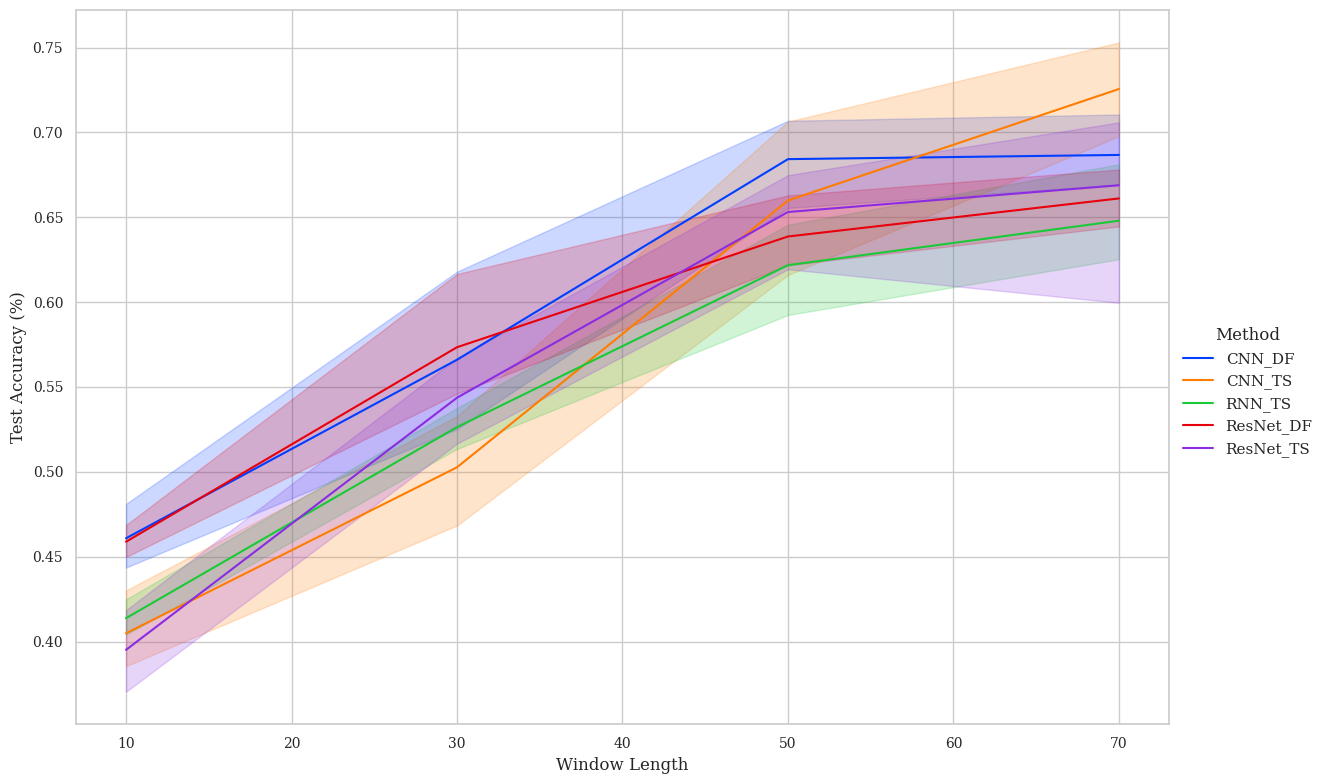

In [42]:
dfg = data.copy()
dfg = dfg[dfg["dataset"] == "CBF"]
dfg["Method"] =  dfg["arch"] + "_" + dfg["mode"] #+ dfg["pretrained"].replace({True: " (Pret)", False: ""}) + dfg["stride_series"].replace({True: " (Strided)", False: ""})
dfg.sort_values(["Method"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')


g = sns.relplot(data=dfg, x="eq_wdw_length", y="val_acc", hue='Method', kind="line", palette="bright",
                height=8, aspect=1.5, legend=True, markers="True", facet_kws={"despine": False})

g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Window Length");

g.savefig("figures/wtst.pdf", bbox_inches='tight')
dfg